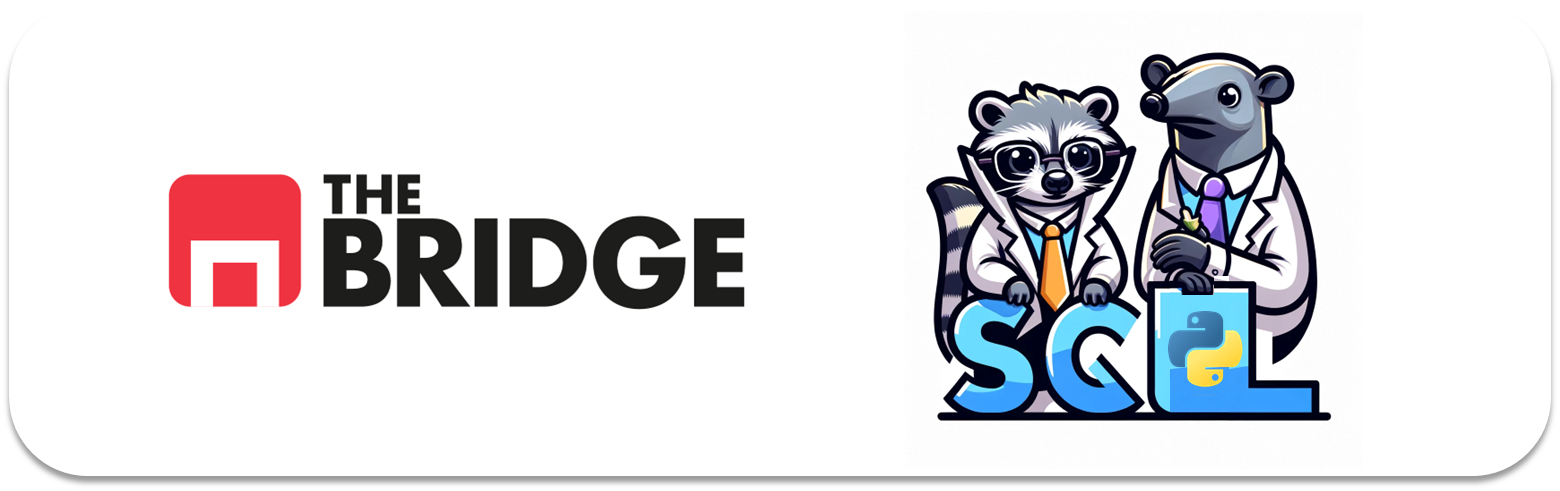

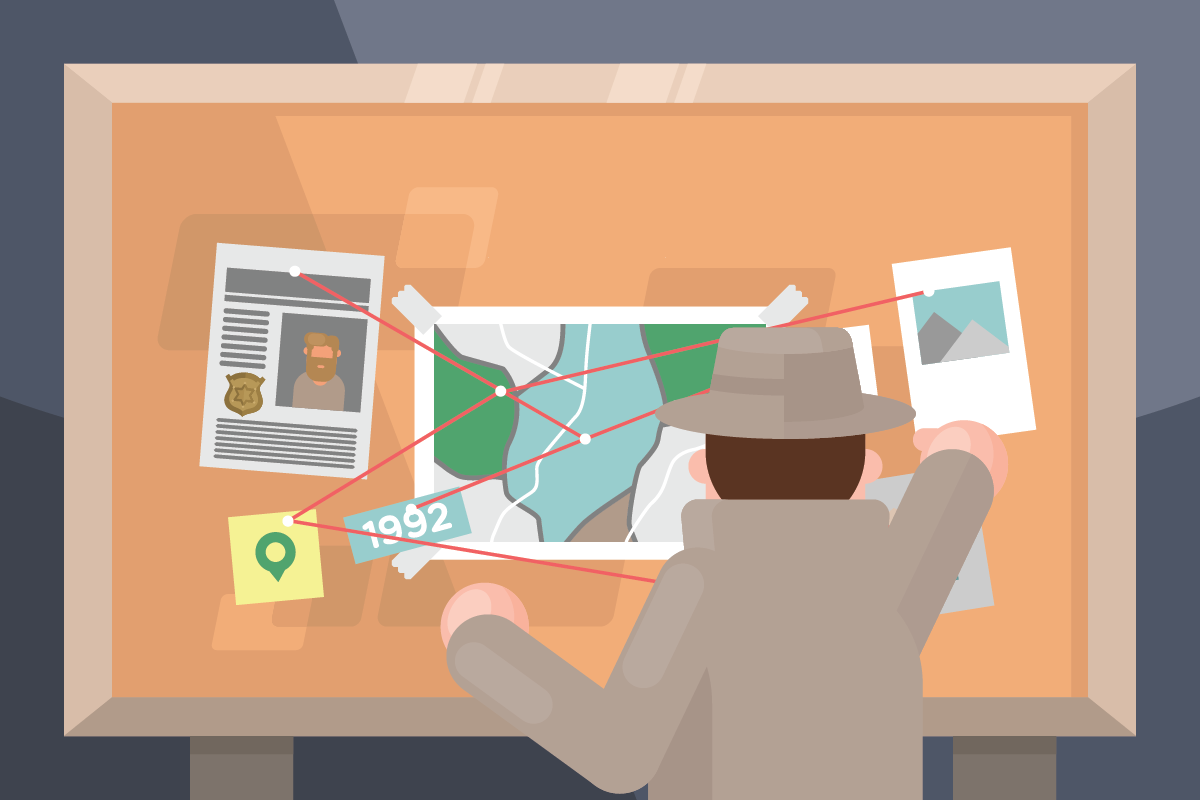


# Práctica Grupal: SQL Murder
Para este ejercicio os vais a ponerte la gabardina y el sombrero ya que tendréis que investigar un asesinato en *SQL City*. 

Aplicaréis los conecptos básicos de SQL y tendréis que manejaros con un modelo de datos, mientras resuelves un caso de asesinato :)

Este espectacular juego está creado por **Joon Park y Cathy He**, y podrás encontrar todos los detalles en [su web](http://mystery.knightlab.com)

Por un lado tendréis que resolver el caso a través de la propia web, donde encontrarás un intérprete de sentencias SQL interactivo. Tendréis que apuntar las queries y su resultado y cuando tengáis el caso resuelto, tendréis que armar un notebook en el que atacando a la base de datos que tenéis en el directorio data, resolváis el crimen con las mismas queries de la página web. 

Subiréis el notebook al repositorio del grupo y haréis una pequeña presentación del resultado y vuestras pesquisas de no más de 10 minutos. Al finalizar el sprint 7.


### Enunciado
A crime has taken place and the detective needs your help. The detective gave you the crime scene report, but you somehow lost it. You vaguely remember that the crime was a **murder** that occurred sometime on **Jan.15, 2018** and that it took place in **SQL City**. Start by retrieving the corresponding crime scene report from the police department’s database.


### Modelo de datos
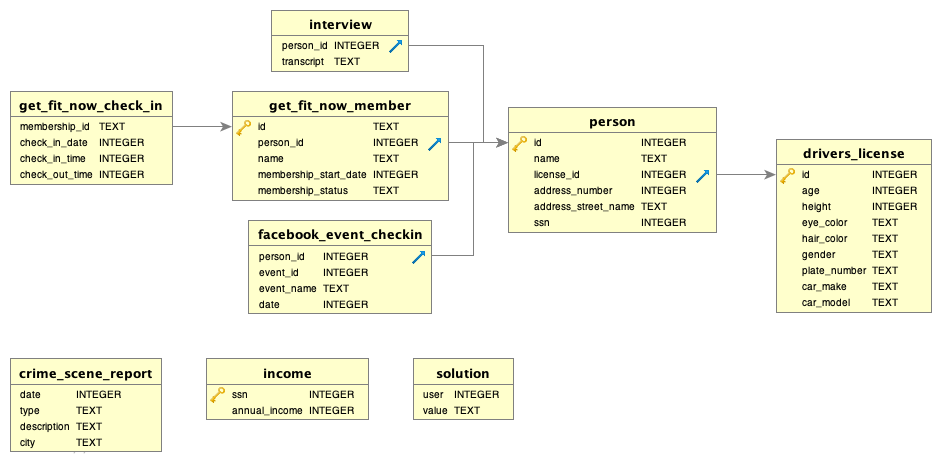




In [1]:
import sqlite3
import pandas as pd

In [2]:
conn = sqlite3.connect('Data/sql-murder-mystery.db')
cursor = conn.cursor()

In [3]:
# Con esta función leemos los datos y lo pasamos a un DataFrame de Pandas
def sql_query(query):

    # Ejecuta la query
    cursor.execute(query) 
    # Almacena los datos de la query 
    ans = cursor.fetchall()

    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in cursor.description]

    return pd.DataFrame(ans,columns=names)


In [4]:
query = '''
SELECT description
FROM crime_scene_report
WHERE type = "murder" and city = "SQL City" and date = 20180115
'''

sql_query(query)

,description
0,Security footage shows that there were 2 witne...


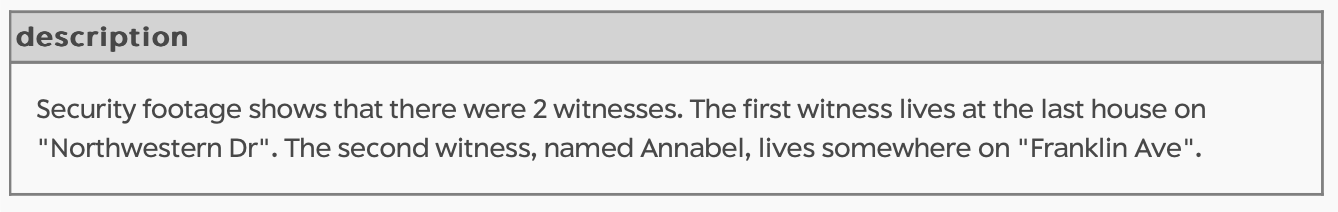

In [5]:
query = '''
SELECT id, name, license_id, ssn, MAX(address_number)
FROM person
WHERE address_street_name = "Northwestern Dr"
'''

sql_query(query)

,id,name,license_id,ssn,MAX(address_number)
0,14887,Morty Schapiro,118009,111564949,4919


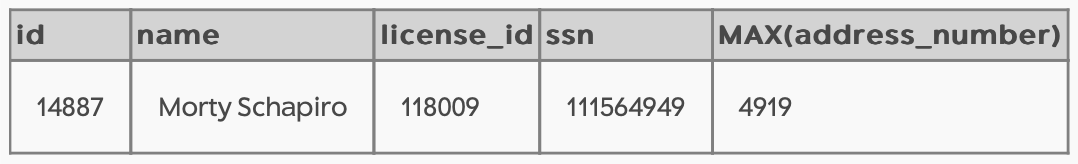

In [6]:
query = '''
SELECT transcript
FROM interview
WHERE person_id = 14887 
'''

sql_query(query)

,transcript
0,I heard a gunshot and then saw a man run out. ...


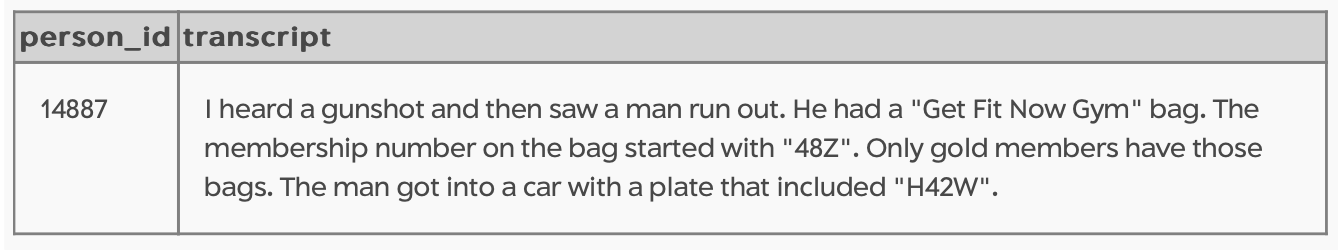

In [7]:
query = '''
SELECT A.id, A.name, A.License_id, B.age, B.gender, B.plate_number, C.membership_status
FROM person A
JOIN drivers_license B ON A.license_id = B.id
JOIN get_fit_now_member C ON A.id = C.person_id
WHERE C.id LIKE '48Z%' AND C.membership_status = 'gold' AND B.plate_number LIKE '%H42W%';
'''

sql_query(query)      

,id,name,license_id,age,gender,plate_number,membership_status
0,67318,Jeremy Bowers,423327,30,male,0H42W2,gold


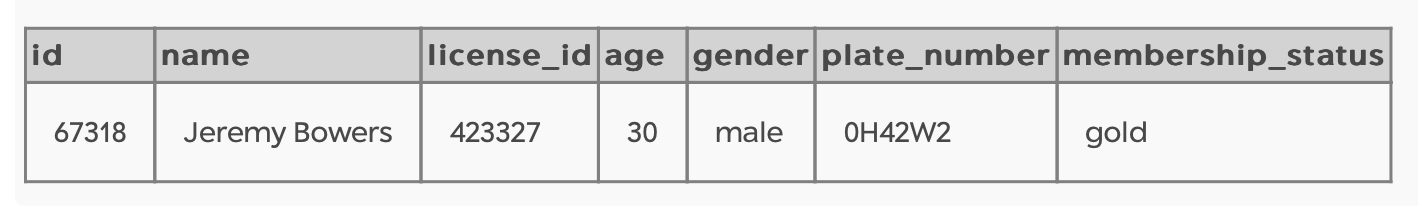

query= '''
INSERT INTO solution VALUES (1, 'Jeremy Bowers');
'''

sql_query(query)

In [8]:
query = '''
 SELECT value FROM solution;   
'''

sql_query(query)  

,value


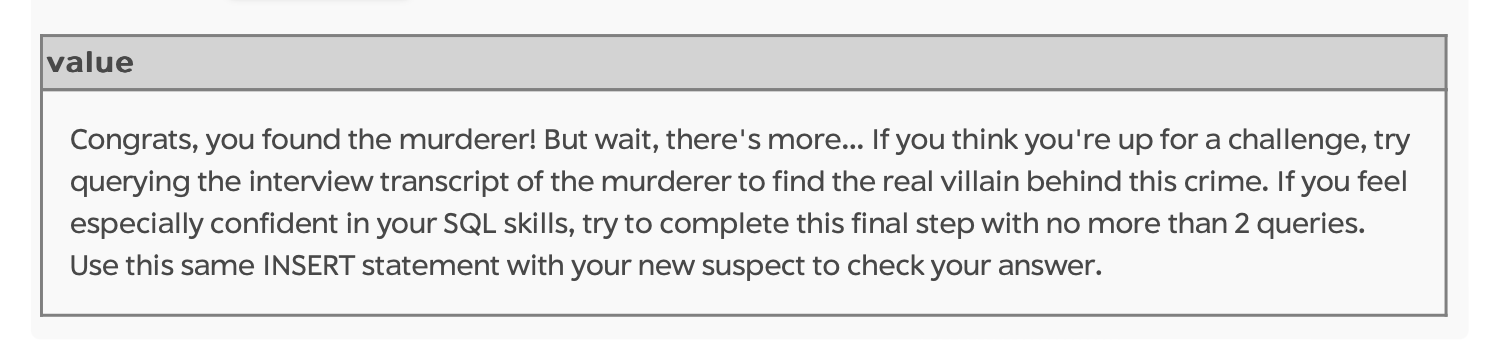

In [9]:
query = '''
SELECT transcript
FROM interview
WHERE person_id = 67318 
'''

sql_query(query)

,transcript
0,I was hired by a woman with a lot of money. I ...


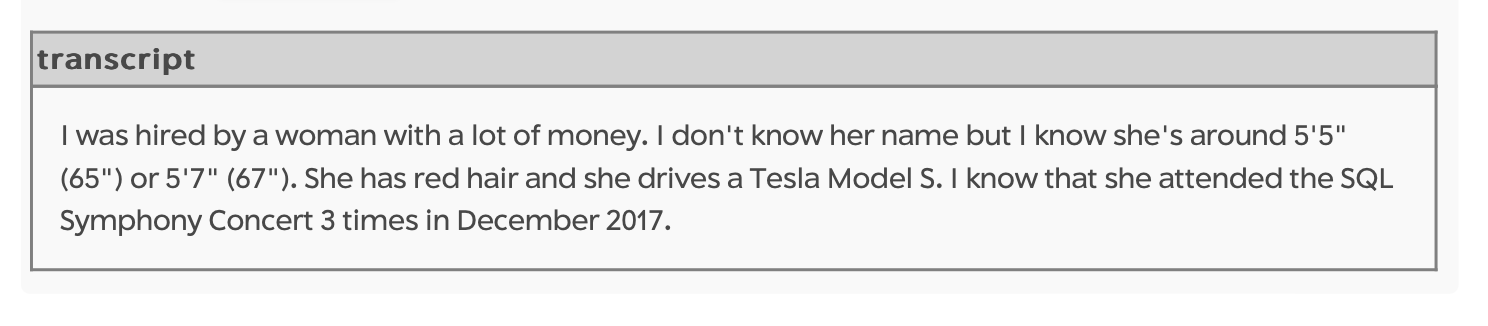

In [19]:
query = '''
SELECT A.*, B.name, C.event_name, C.date, COUNT(C.event_name) AS event_count, D.annual_income
FROM drivers_license A
JOIN person B ON A.id = B.license_id
JOIN facebook_event_checkin C ON B.id = C.person_id
JOIN income D ON B.ssn = D.ssn
WHERE A.hair_color = 'red'
   AND A.car_make = 'Tesla'
   AND A.car_model = 'Model S'
   AND A.gender = 'female'
   AND C.event_name = 'SQL Symphony Concert'
   AND C.date BETWEEN 20171201 AND 20171231
GROUP BY A.id
'''

sql_query(query)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model,name,event_name,date,event_count,annual_income
0,202298,68,66,green,red,female,500123,Tesla,Model S,Miranda Priestly,SQL Symphony Concert,20171206,3,310000


query = '''
INSERT INTO solution VALUES (1, 'Miranda Priestly');
'''

sql_query(query)  

In [11]:
query = '''
        
 SELECT value FROM solution;
'''

sql_query(query)


,value


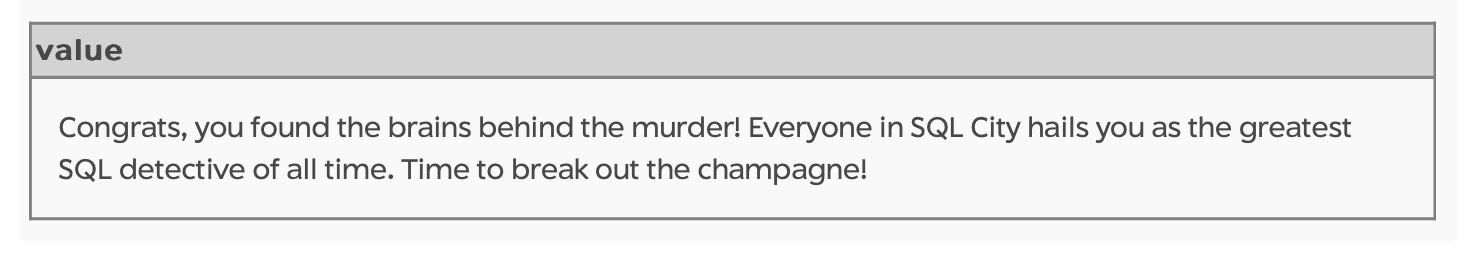